<a href="https://colab.research.google.com/github/Shaheer04/PFAI-Assignment/blob/main/PFAI_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from scipy import stats
from scipy.integrate import odeint, solve_ivp

In [11]:
df = pd.read_csv('patient_data.csv')

## Q1: Outlier Detection and Feature Reduction


In [13]:
# Q1: Outlier Detection and Feature Reduction
selector = VarianceThreshold(threshold=0)
numeric_data = df.select_dtypes(include=[np.number])
selector.fit(numeric_data)
constant_features = numeric_data.columns[~selector.get_support()]
df = df.drop(columns=constant_features)

In [14]:
Q1 = df['CholesterolLevel'].quantile(0.25)
Q3 = df['CholesterolLevel'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['CholesterolLevel'] >= lower_bound) & (df['CholesterolLevel'] <= upper_bound)]

In [15]:
df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

## Q2: Data Visualization


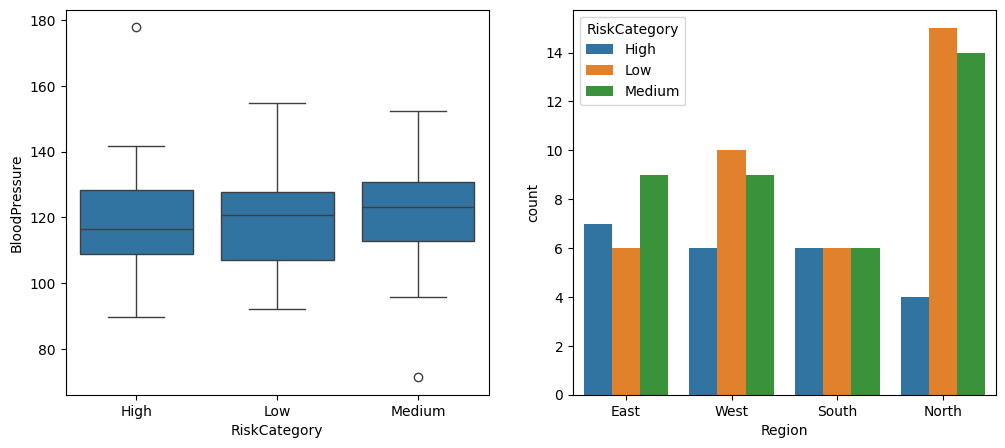

In [16]:
# Q2: Data Visualization
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='RiskCategory', y='BloodPressure')
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Region', hue='RiskCategory')
plt.show()

## Q3: Statistical Hypothesis Testing


In [17]:
sample_data = df['CholesterolLevel'].sample(n=20, random_state=42)
t_stat, p_val = stats.ttest_1samp(sample_data, 200)
print(f"H₀: μ = 200, H₁: μ ≠ 200")
print(f"t-statistic: {t_stat:.4f}, p-value: {p_val:.4f}")
print("Reject H₀" if p_val < 0.05 else "Fail to reject H₀")

H₀: μ = 200, H₁: μ ≠ 200
t-statistic: 1.1450, p-value: 0.2664
Fail to reject H₀


In [18]:
contingency_table = pd.crosstab(df['Region'], df['RiskCategory'])
chi2, p_chi2, dof, expected = stats.chi2_contingency(contingency_table)
print(f"H₀: Independent, H₁: Not independent")
print(f"Chi-square: {chi2:.4f}, p-value: {p_chi2:.4f}")
print("Reject H₀" if p_chi2 < 0.05 else "Fail to reject H₀")

H₀: Independent, H₁: Not independent
Chi-square: 4.8247, p-value: 0.5665
Fail to reject H₀


## Q4: Modeling with ODE


In [19]:
k, D, C0 = 0.1, 100, 0
t = np.linspace(0, 50, 500)

In [20]:
def ode_func(C, t): return k * (D - C)
def ode_func_ivp(t, C): return k * (D - C)

In [21]:
sol_odeint = odeint(ode_func, C0, t)
sol_ivp = solve_ivp(ode_func_ivp, (0, 50), [C0], t_eval=t)

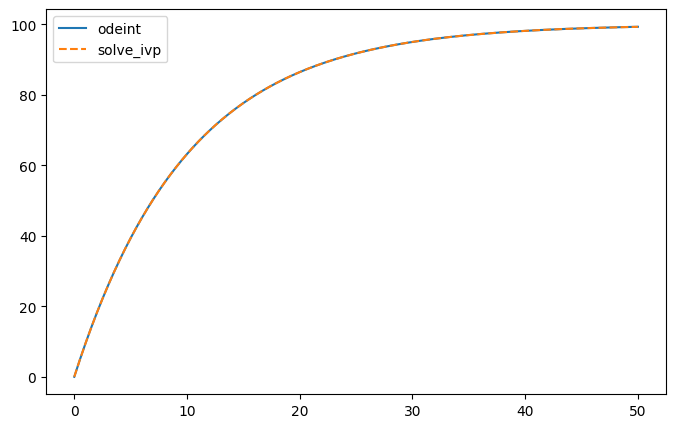

In [22]:
plt.figure(figsize=(8, 5))
plt.plot(t, sol_odeint, label='odeint')
plt.plot(sol_ivp.t, sol_ivp.y[0], '--', label='solve_ivp')
plt.legend()
plt.show()

In [23]:
print(f"Max difference: {np.max(np.abs(sol_odeint.flatten() - sol_ivp.y[0])):.2e}")

Max difference: 1.33e-02
